In [32]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from openpyxl import load_workbook

# Theme clustering

In [7]:
# 下载停用词和分词所需的数据
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yangli/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/yangli/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# 定义停用词集合
stop_words = set(stopwords.words('english'))
# 定义标点符号集合
punctuation = set(string.punctuation)

In [153]:
Theme = pd.read_csv('./Data/gTAXONOMY--GKG THEMES - Sheet1.csv')
Theme

Descriptions = Theme['Description']
Descriptions = Descriptions.astype(str).tolist()

,Type,Name,Date Added,Modified History,Description,Unnamed: 5,Unnamed: 6,Keywords Tvesha Desai's Additions,Sources,Deletations,Jermin deletions,Hirans deletions,Jessica Deletions,Jessica Additions,Jessica-Source
0,Theme,ACT_FORCEPOSTURE,01/10/14,01/10/14,Actions relating to changes in force posture,NaN,NaN,"Criminal Justice, Representative Democracy, gl...",https://www.gao.gov/products/gao-09-706r,NaN,None,"above the law, federal government, Tort law",None,NaN,NaN
1,Theme,ACT_HARMTHREATEN,01/10/14,01/10/14,Actions relating to harming or threatening,NaN,NaN,"\nlegal actions, Intimidation, Stalking",https://www.legalmatch.com/law-library/article...,NaN,None,"Exploit, disciplinary, adverse actions",None,NaN,NaN
2,Theme,ACT_MAKESTATEMENT,01/10/14,01/10/14,Actions relating to making a statement,NaN,NaN,"Defamation, False Statements, law and morality...",https://www.justice.gov/archives/jm/criminal-r...,NaN,None,knowingly false,"law and morality, Prosecution",NaN,NaN
3,Theme,ACT_YIELD,01/10/14,01/10/14,Actions relating to yielding,NaN,NaN,"Emergency vehicles, Railway crossings, Steep f...",https://attorneyguss.com/yielding-and-right-of...,None,None,Insurance Increases,None,NaN,NaN
4,Count,AFFECT,13/10/13,13/10/13,This broad category captures everything from b...,NaN,NaN,"Humantarian Evacuations, Strategy for Communit...",https://www.refworld.org/pdfid/57fe09284.pdf,NaN,NaN,"Ethical, Political and Logistical Implications...",None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,Theme,VIOLENT_UNREST,13/10/13,13/10/13,"Discussion of violent unrest, from rubber bull...",NaN,NaN,"Constitutional Protests,Critical Legislation",https://www.flgov.com/2021/04/19/what-they-are...,NaN,NaN,"Communities,Chaos,Assemblies,Civilians,Peacefu...",None,NaN,NaN
279,Theme,WATER_SECURITY,13/10/13,13/10/13,"Drought, water access, lack of rain, clean wat...",NaN,NaN,"Inadequate Water Supply,Rainwater,Flash Drough...",https://www.usgs.gov/faqs/why-doesnt-drought-e...,NaN,NaN,"Ecosystems,",None,NaN,NaN
280,Theme,WHISTLEBLOWER,13/10/13,13/10/13,"Whistleblowers, document leaks, etc",NaN,NaN,"abuse of authority,",https://www.voanews.com/a/whistleblowing-and-l...,NaN,NaN,"mismanagement,Prohibit, retribution, Revealing...",None,NaN,NaN
281,Theme,WMD,13/10/13,13/10/13,"Weapons of mass distruction, from nuclear to b...",NaN,NaN,Disarmament Weapons,https://www.britannica.com/technology/weapon-o...,NaN,NaN,",grievous threat,massed formations,severe outb...",None,NaN,NaN


In [35]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    # 删除停用词和标点符号
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    # 连接词汇成为字符串
    processed_text = ' '.join(tokens)
    return processed_text

In [36]:
# 应用文本预处理
processed_descriptions = [preprocess_text(desc) for desc in Descriptions]

# 特征提取
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_descriptions)

# 聚类
k = 5  # 聚类数量，根据需求进行调整
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# 获取聚类结果
cluster_labels = kmeans.labels_

# 将聚类结果添加到数据框中
Theme['cluster_label'] = cluster_labels

# show label
Theme['cluster_label']

In [5]:
# 应用文本预处理
processed_descriptions = [preprocess_text(desc) for desc in descriptions]

# 特征提取
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_descriptions)

# 聚类
k = 3  # 聚类数量，根据需求进行调整
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# 获取聚类结果
cluster_labels = kmeans.labels_

# 将聚类结果添加到数据框中
df['cluster_label'] = cluster_labels

# 输出聚类结果
print(df[['theme', 'description', 'cluster_label']])

# Filter news on days where the price/volatility changed significantly

* Currently, I am using a price series of Lithium futures. The first step is to identify dates with significant price changes from this price series. I have set a time range from 1 to 10 days and a percentage change range from 0.01 to 0.17. I have written a nested for loop to investigate cumulative returns for each combination of days and percentage changes, checking if they exceed thresholds such as 0.01, 0.02, up to 0.17. Therefore, there should be a total of 170 combinations of answers. Each combination represents a specific number of days and a specific percentage change, indicating dates where the cumulative return satisfies the condition. For example, (0.1, 10) represents dates where the cumulative return exceeds 0.1 after 10 days. After obtaining these 170 combinations of answers, I store them in a dictionary.

* Next, we need to use these dates to search for news articles published within those dates in the "lithium_merged" dataset. Again, I store the news articles in a dictionary. It is important to note that I merge combinations with the same percentage change because there might be duplicates. For instance, (0.1, 1) and (0.1, 2) may contain overlapping dates. Thus, merging them before searching for news articles is necessary.

* The above statement is an explanation of the approach based on price change

* Actually, we'll discuss two approaches. 
* The first one is filtering the news in t-1,t-2,...t-10, where t is the date of large price change 
* The second one is filtering the news in t-1,t-2,...t-10, where t is the date of large volatility change 

## Data preparation

In [12]:
df_Lifu = pd.read_excel('./Data/Historical Prices (9).xlsx')

# Remove '.' from dates
df_Lifu['Date'] = df_Lifu['Date'].str.replace('.', '')
# Convert dates
df_Lifu['Date'] = pd.to_datetime(df_Lifu['Date'], format="%b %d, %Y")

<ipython-input-12-744cee7e106e>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_Lifu['Date'] = df_Lifu['Date'].str.replace('.', '')


In [13]:
def convert_string_to_numeric(s):
    """
    Convert strings like '5.74M' or '532.50K' to numeric values
    """
    s = str(s).replace(',', '')  # Remove commas
    if 'M' in s:
        return float(s.replace('M', '')) * 1e6
    elif 'K' in s:
        return float(s.replace('K', '')) * 1e3
    else:
        return float(s)

# Convert columns 'Open', 'High', 'Close', 'Low' from string to numeric
for col in ['Open', 'High', 'Close', 'Low']:
    df_Lifu[col] = df_Lifu[col].apply(convert_string_to_numeric)


In [14]:
df_Lifu.set_index('Date', inplace=True)
df_Lifu = df_Lifu[::-1]
df_Lifu_price = df_Lifu

#for col in df_Lifu.columns:
    #df_Lifu[col] = np.log(df_Lifu[col]) - np.log(df_Lifu[col].shift(1))

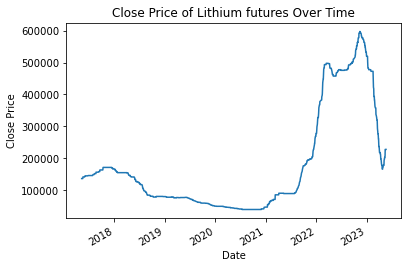

In [15]:
#绘制 'Close' 列的折线图
df_Lifu['Close'].plot()

# 设置图表的标题
plt.title('Close Price of Lithium futures Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 显示图表
plt.show()

In [23]:
# Check
df_Lifu_price.head(20)

,Open,High,Low,Close,Change %,Volume,log_return,volatility
Date,,,,,,,,
2017-05-10,136000.0,140000.0,132000.0,136000.0,0.00,0,NaN,NaN
2017-05-11,136000.0,140000.0,132000.0,136000.0,0.00,0,0.000000,NaN
2017-05-12,136000.0,140000.0,132000.0,136000.0,0.00,0,0.000000,NaN
2017-05-15,136000.0,140000.0,132000.0,136000.0,0.00,0,0.000000,NaN
2017-05-16,136000.0,140000.0,132000.0,136000.0,0.00,0,0.000000,NaN
2017-05-17,136000.0,140000.0,132000.0,136000.0,0.00,0,0.000000,0.000000
2017-05-18,136000.0,140000.0,132000.0,136000.0,0.00,0,0.000000,0.000000
2017-05-19,141000.0,145000.0,137000.0,141000.0,3.68,0,0.036105,0.016147
2017-05-22,141000.0,145000.0,137000.0,141000.0,0.00,0,0.000000,0.016147


In [17]:
df_Lifu_price['log_return'] = np.log(df_Lifu_price['Close']).diff() #计算log return

# Calculate rolling volatility with a 5-day window
df_Lifu_price['volatility'] = df_Lifu_price['log_return'].rolling(window=5).std()

# Use describe() to get statistics
volatility_stats = df_Lifu_price['volatility'].describe()

print(volatility_stats)

count    1491.000000
mean        0.005757
std         0.009649
min         0.000000
25%         0.000000
50%         0.002933
75%         0.008313
max         0.083646
Name: volatility, dtype: float64


In [18]:
# Import Lithium_merged
Lithium_news = pd.read_csv('./Data/lithium_merged.csv')
Lithium_news 

,Unnamed: 0,DATE,DocumentIdentifier,V2Tone,Themes,Organizations,FinalThemes
0,13,20200103223000,https://www.independent.co.uk/life-style/gadge...,-0.437318,SCIENCE;MANMADE_DISASTER_IMPLIED;WB_135_TRANSP...,['google'],"SCIENCE,MANMADE_DISASTER_IMPLIED,EDUCATION,DEL..."
1,28,20200106004500,https://cleantechnica.com/2020/01/05/energy-st...,-0.150038,WB_135_TRANSPORT;WB_1174_WAREHOUSING_AND_STORA...,"['twitter inc', 'facebook inc']","EDUCATION,ENV_GREEN,ENV_MINING,TAX_DISEASE"
2,71,20200107011500,https://calgaryherald.com/business/local-busin...,0.846561,UNGP_FORESTS_RIVERS_OCEANS;SLFID_NATURAL_RESOU...,"['twitter inc', 'tesla inc']","SLFID_NATURAL_RESOURCES,ENV_OIL,ENV_CLIMATECHA..."
3,73,20200107031500,https://calgarysun.com/business/local-business...,0.847458,UNGP_FORESTS_RIVERS_OCEANS;SLFID_NATURAL_RESOU...,"['twitter inc', 'tesla inc']","SLFID_NATURAL_RESOURCES,ENV_OIL,ENV_CLIMATECHA..."
4,87,20200107154500,https://nationalpost.com/business/local-busine...,0.842993,UNGP_FORESTS_RIVERS_OCEANS;SLFID_NATURAL_RESOU...,"['twitter inc', 'tesla inc']","SLFID_NATURAL_RESOURCES,ENV_OIL,ENV_CLIMATECHA..."
...,...,...,...,...,...,...,...
8308,7612,20191225043000,https://seekingalpha.com/article/4314058-lithi...,1.646091,TAX_FNCACT;TAX_FNCACT_MINER;TAX_ECON_PRICE;UNG...,"['goldman sachs group inc', 'nasdaq inc']",MANMADE_DISASTER_IMPLIED
8309,7659,20191227041500,https://www.nasdaq.com/articles/chilean-lithiu...,-1.777778,UNGP_FORESTS_RIVERS_OCEANS;TAX_ETHNICITY;TAX_E...,['nasdaq inc'],"TAX_ETHNICITY,ETH_INDIGINOUS,ENV_MINING,TOURIS..."
8310,7661,20191227070000,https://www.faz.net/aktuell/wissen/kostbares-l...,-2.390748,TAX_FNCACT;TAX_FNCACT_NAVIGATOR;UNGP_FORESTS_R...,['google'],"DISABILITY,DELAY,TAX_DISEASE,KILL"
8311,7663,20191227130000,https://hexus.net/ce/news/general/138188-ibm-i...,1.108033,MEDIA_SOCIAL;UNGP_FORESTS_RIVERS_OCEANS;SCIENC...,['ibm'],"SCIENCE,NEGOTIATIONS"


In [19]:
Lithium_news.set_index('DATE', inplace=True)
Lithium_news.index = pd.to_datetime(Lithium_news.index, format = '%Y%m%d%H%M%S')
Lithium_news = Lithium_news.sort_index(ascending = True)

* Start 

## Filter the news based on price change

In [24]:
days = 10
thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,
              0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25]
results = {}

In [25]:
# First find dates where price change 
for i in range(days, len(df_Lifu_price)):
    current_date = df_Lifu_price.index[i]
    
    
    for j in range(1, days+1):
        past_date = df_Lifu_price.index[i - j]
        current_price = df_Lifu_price.loc[current_date, 'Close']
        past_price = df_Lifu_price.loc[past_date, 'Close']
        past_changes = np.log(current_price/past_price) # log return
        
        for threshold in thresholds:
            if abs(past_changes) > threshold:
                key = (threshold, j)
                if key not in results:
                    results[key] = []
                results[key].append((past_date, current_date, j))

In [26]:
# find news on the day that price changed significantly
filtered_news = {}
number_news = {}


for key, result_dates in results.items():
    df_filtered_news = pd.DataFrame()
    
    for result in result_dates:
        past_date, current_date, j = result
        
        # filter news between current_date and future_date 
        filtered_Lithium_news = Lithium_news[(Lithium_news.index >= past_date) & (Lithium_news.index <= current_date)]
        past_price = df_Lifu_price.loc[past_date, 'Close']
        current_price = df_Lifu_price.loc[current_date, 'Close']
        past_changes = np.log(current_price/past_price) # log return
        filtered_Lithium_news['sign'] = np.where(past_changes >= 0, 'Positive', 'Negative')
        
        # append the filtered news to the dataframe
        df_filtered_news = pd.concat([df_filtered_news, filtered_Lithium_news])
    
    #remove duplicates
    df_filtered_news =  df_filtered_news.drop_duplicates()
    number = len(df_filtered_news)
    # add the dataframe to the dictionary
    filtered_news[key] = df_filtered_news
    number_news[key] = number 

<ipython-input-26-0bfc6198519a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Lithium_news['sign'] = np.where(past_changes >= 0, 'Positive', 'Negative')


In [27]:
# merged the results in days, since the news are in 15 minutes (just for reference)
filtered_news_by_date = {}

for key, df_filtered_news in filtered_news.items():
    df_filtered_news['Date'] = pd.to_datetime(df_filtered_news.index).date
    
    grouped_news = df_filtered_news.groupby('Date')
    filtered_news_by_date[key] = {date: group for date, group in grouped_news}


In [28]:
# e.g., search news on 2020-12-07
date = pd.to_datetime('2020-12-07').date()
filtered_news_by_date[(0.1,10)].get(date)

,Unnamed: 0,DocumentIdentifier,V2Tone,Themes,Organizations,FinalThemes,sign,Date
DATE,,,,,,,,
2020-12-07 07:45:00,4975,https://www.businesstimes.com.sg/energy-commod...,0.328947,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;TAX_FNC...,['citigroup inc'],"TAX_ETHNICITY,NEGOTIATIONS",Positive,2020-12-07
2020-12-07 09:45:00,4987,https://www.reuters.com/article/tianqi-lithium...,0.749064,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_ANALYST;M...,"['citigroup inc', 'albemarle corp']","MOVEMENT_GENERAL,TAX_ETHNICITY,NEGOTIATIONS,EC...",Positive,2020-12-07
2020-12-07 14:00:00,4995,https://www.msn.com/en-us/money/topstocks/pied...,1.597444,ECON_STOCKMARKET;TAX_FNCACT;TAX_FNCACT_TRADERS...,['tesla inc'],"ECON_STOCKMARKET,TAX_ETHNICITY",Positive,2020-12-07
2020-12-07 14:30:00,4996,https://www.reuters.com/article/tianqi-lithium...,1.245552,TAX_ECON_PRICE;TAX_ETHNICITY;TAX_ETHNICITY_AUS...,"['citigroup inc', 'albemarle corp']","TAX_ETHNICITY,NEGOTIATIONS,ECON_DEBT,ECON_STOC...",Positive,2020-12-07
2020-12-07 14:30:00,4997,https://www.prnewswire.com:443/news-releases/c...,1.248439,TAX_FNCACT;TAX_FNCACT_MANUFACTURER;WB_1921_PRI...,['nasdaq inc'],"ECON_STOCKMARKET,LEGISLATION",Positive,2020-12-07
2020-12-07 21:45:00,5010,https://www.prnewswire.com:443/news-releases/a...,2.621723,ECON_STOCKMARKET;TAX_FNCACT;TAX_FNCACT_LEADER;...,['albemarle corp'],ECON_STOCKMARKET,Positive,2020-12-07


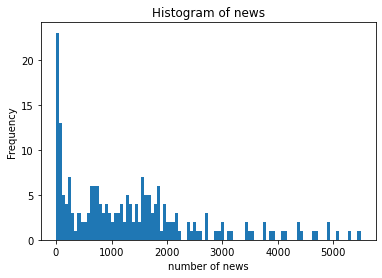

In [29]:
# Histogram of number of news
values = list(number_news.values())

plt.hist(values, bins=100)
plt.xlabel('number of news')
plt.ylabel('Frequency')
plt.title('Histogram of news')
plt.show()

In [30]:
# Then search news based on different percentage we set 
# we'll merge 'threshold' from this step

thresholds = [-0.25, -0.24, -0.23, -0.22, -0.21, -0.20, -0.19, -0.18, -0.17, -0.16, 
              -0.15, -0.14, -0.13, -0.12, -0.11, -0.10, -0.09, -0.08, -0.07, -0.06, -0.05, 
              -0.04, -0.03, -0.02, -0.01, 0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 
              0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25]

related_news = {}

for threshold in thresholds:
    news_pos = pd.DataFrame()
    news_neg = pd.DataFrame()
    for i in range(1, days+1):
        if (threshold,i) not in filtered_news:
            continue
        news_pos = pd.concat([news_pos, filtered_news[(threshold,i)][filtered_news[(threshold,i)]['sign']=='Positive']])
        news_neg = pd.concat([news_neg, filtered_news[(threshold,i)][filtered_news[(threshold,i)]['sign']=='Negative']])
    news_pos = news_pos.drop_duplicates()
    news_neg = news_neg.drop_duplicates()
    related_news[threshold] = news_pos
    related_news[-threshold] = news_neg

In [31]:
# e.g., if we search news that could cause +1% return 
related_news[0.01]

,Unnamed: 0,DocumentIdentifier,V2Tone,Themes,Organizations,FinalThemes,sign,Date
DATE,,,,,,,,
2017-05-31 05:30:00,4138,https://www.pehub.com/2017/05/vista-to-acquire...,3.870968,WB_678_DIGITAL_GOVERNMENT;WB_694_BROADCAST_AND...,['nasdaq inc'],"ECON_STOCKMARKET,ECON_ENTREPRENEURSHIP,SCIENCE",Positive,2017-05-31
2017-05-31 06:15:00,4140,http://www.spacedaily.com/reports/Graphene_nan...,-0.314465,TAX_FOODSTAPLES;TAX_FOODSTAPLES_RICE;EDUCATION...,['facebook inc'],"TAX_FOODSTAPLES,EDUCATION,SCIENCE,MARITIME,TAX...",Positive,2017-05-31
2017-05-31 13:00:00,4146,http://www.einnews.com/pr_news/384147127/gold-...,4.402516,WB_2936_GOLD;WB_507_ENERGY_AND_EXTRACTIVES;WB_...,['group nine media'],"ENV_MINING,ECON_STOCKMARKET",Positive,2017-05-31
2017-05-31 13:45:00,4148,http://www.prnewswire.com/news-releases/the-im...,0.942460,TRANSPARENCY;ENV_MINING;TAX_FNCACT;TAX_FNCACT_...,['twitter inc'],"TRANSPARENCY,ENV_MINING,DEMOCRACY,GENERAL_GOVE...",Positive,2017-05-31
2017-06-05 13:00:00,51,http://www.einnews.com/pr_news/385024849/wealt...,1.470588,WB_286_TELECOMMUNICATIONS_AND_BROADBAND_ACCESS...,['group nine media'],"MANMADE_DISASTER_IMPLIED,ENV_MINING,TAX_ETHNIC...",Positive,2017-06-05
...,...,...,...,...,...,...,...,...
2022-06-16 13:45:00,24281,https://www.bnnbloomberg.ca/tianqi-lithium-win...,0.526316,TAX_ETHNICITY;TAX_ETHNICITY_CHINESE;TAX_WORLDL...,['morgan stanley'],"TAX_ETHNICITY,ECON_STOCKMARKET",Positive,2022-06-16
2022-06-16 16:15:00,24283,https://apnews.com/article/fact-check-pipeline...,-0.804290,MEDIA_SOCIAL;UNGP_FORESTS_RIVERS_OCEANS;WB_229...,['facebook inc'],ENV_OIL,Positive,2022-06-16
2022-08-08 19:00:00,26363,https://www.proactiveinvestors.com/companies/n...,2.824859,EPU_ECONOMY_HISTORIC;TAX_FNCACT;TAX_FNCACT_CHI...,['albemarle corp'],ENV_MINING,Positive,2022-08-08


In [38]:
# Write theme counts of each return level into excel
returns = [-0.25, -0.24, -0.23, -0.22, -0.21, -0.20, -0.19, -0.18, -0.17, -0.16, 
              -0.15, -0.14, -0.13, -0.12, -0.11, -0.10, -0.09, -0.08, -0.07, -0.06, -0.05, 
              -0.04, -0.03, -0.02, -0.01, 0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 
              0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25]


with pd.ExcelWriter('themes_counts.xlsx') as writer:
    for return_value in returns:
        all_themes = pd.Series(dtype='str')
        if 'FinalThemes' in related_news[return_value].columns:
            for themes in related_news[return_value]['FinalThemes']:
                themes_list = themes.split(',')
                all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)

        # 打印当前年份和月份的主题及其出现次数
            theme_counts = all_themes.value_counts()
            sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
            top_themes = sorted_themes[:15]

            df = pd.DataFrame(top_themes, columns=['Theme', 'Count'])
            df.to_excel(writer, sheet_name=str(return_value), index=False)

    print('Themes and counts written to Excel.')


Themes and counts written to Excel.


In [173]:
# Search top 15 themes in each level of return 
# e.g., search top 15 themes that are in news which caused +8% return
all_themes = pd.Series(dtype='str') 
for themes in related_news[0.08]['FinalThemes']:
    themes_list = themes.split(',')
    all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    
# print 
theme_counts = all_themes.value_counts()
sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
top_themes = sorted_themes[:15]

for theme, count in top_themes:
    print(theme, count)

TAX_ETHNICITY 626
ENV_MINING 488
ECON_STOCKMARKET 460
GENERAL_GOVERNMENT 302
MANMADE_DISASTER_IMPLIED 283
LEGISLATION 254
TAX_DISEASE 199
GENERAL_HEALTH 171
SLFID_MINERAL_RESOURCES 165
SCIENCE 135
ENV_GREEN 129
EDUCATION 121
DELAY 103
HEALTH_PANDEMIC 91
ENV_CLIMATECHANGE 89


### Just for test

* If we divide the news into different months and then search the top 15 themes based each level of return

In [283]:
# 0.17
related_news[0.17].index = pd.to_datetime(related_news[0.17].index)

groups = related_news[0.17].groupby([related_news[0.17].index.year, related_news[0.17].index.month])

year_month_list = []

# 循环遍历每个组并打印数据
for group_keys, group_data in groups:
    year, month = group_keys
    print(f"Year: {year}, Month: {month}")
    print(group_data)
    print("--------------------------------------")
    
    year_month_list.append((year, month))

Year: 2021, Month: 1
                     Unnamed: 0  \
DATE                              
2021-01-13 01:30:00        5596   
2021-01-13 03:15:00        5598   
2021-01-13 07:45:00        5602   
2021-01-14 08:45:00        5649   
2021-01-15 06:45:00        5690   
...                         ...   
2021-01-28 16:45:00        6131   
2021-01-29 15:00:00        6170   
2021-01-29 16:30:00        6172   
2021-01-30 11:45:00        6185   
2021-01-31 11:00:00        6191   

                                                    DocumentIdentifier  \
DATE                                                                     
2021-01-13 01:30:00  https://www.mining.com/web/lithium-miners-germ...   
2021-01-13 03:15:00  https://investingnews.com/news/lithium-investi...   
2021-01-13 07:45:00  https://cleantechnica.com/2021/01/12/albemarle...   
2021-01-14 08:45:00  https://smallcaps.com.au/galan-lithium-acquire...   
2021-01-15 06:45:00  https://www.fnarena.com/index.php/2021/01/15/m...   
...  

In [291]:
#对于threshold为0.17的按月分结果
year_month_list

[(2021, 1),
 (2021, 2),
 (2021, 3),
 (2021, 8),
 (2021, 9),
 (2021, 12),
 (2022, 1),
 (2022, 2),
 (2022, 3),
 (2023, 4),
 (2023, 5)]

In [290]:
# 按月份一个一个来看新闻的出现最多的theme
# all_themes_by_ym是一个threshold按月份分类的themes集合
all_themes_by_ym = {}
for ym in year_month_list:
    all_themes = pd.Series(dtype='str')
    news_ym = groups.get_group(ym)
    
    for themes in news_ym['FinalThemes']:
        themes_list = themes.split(',')
        all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    # 将当前年份和月份的主题列表存储到字典中
    all_themes_by_ym[ym] = all_themes
    
    # 打印当前年份和月份的主题及其出现次数
    theme_counts = all_themes.value_counts()
    print(f"Themes for {ym}:")
    print(theme_counts)
    print()

# 打印全部年份和月份的主题列表
for ym, themes in all_themes_by_ym.items():
    print(f"Themes for {ym}:")
    print(themes)
    print()


Themes for (2021, 1):
TAX_ETHNICITY                  43
ECON_STOCKMARKET               34
ENV_MINING                     31
GENERAL_GOVERNMENT             21
LEGISLATION                    20
SLFID_MINERAL_RESOURCES        15
MANMADE_DISASTER_IMPLIED       13
GENERAL_HEALTH                 12
ENV_GREEN                      10
TAX_DISEASE                     9
ECON_TAXATION                   9
HEALTH_PANDEMIC                 8
DELAY                           8
EDUCATION                       7
ECON_INTEREST_RATES             6
TRANSPARENCY                    6
SLFID_NATURAL_RESOURCES         6
NEGOTIATIONS                    5
SCIENCE                         5
MEDICAL                         5
ENV_CLIMATECHANGE               5
MARITIME                        4
ECON_DEBT                       4
ECON_ENTREPRENEURSHIP           4
KILL                            4
ECON_CURRENCY_EXCHANGE_RATE     4
ECON_SUBSIDIES                  3
ELECTION                        3
PROTEST                   

Themes for (2023, 5):
TAX_ETHNICITY               139
ENV_MINING                  121
ECON_STOCKMARKET            106
MANMADE_DISASTER_IMPLIED     74
GENERAL_GOVERNMENT           60
                           ... 
PRIVATIZATION                 1
ECON_EARNINGSREPORT           1
UNEMPLOYMENT                  1
SOC_ECONCOOP                  1
POVERTY                       1
Length: 92, dtype: int64

Themes for (2021, 1):
0                 TAX_ETHNICITY
1         ECON_ENTREPRENEURSHIP
2                     ECON_DEBT
3                ECON_SUBSIDIES
4              ECON_STOCKMARKET
                 ...           
321    MANMADE_DISASTER_IMPLIED
322               TAX_ETHNICITY
323                       DELAY
324              GENERAL_HEALTH
325          GENERAL_GOVERNMENT
Length: 326, dtype: object

Themes for (2021, 2):
0          ECON_STOCKMARKET
1               LEGISLATION
2          ECON_STOCKMARKET
3                   SCIENCE
4     ECON_ENTREPRENEURSHIP
              ...          
86      

In [288]:
news_ym['FinalThemes']

DATE
2023-05-07 16:00:00    SLFID_MINERAL_RESOURCES,ECON_STOCKMARKET,RETIR...
2023-05-08 00:45:00    ECON_STOCKMARKET,ENV_MINING,SHORTAGE,TAX_ETHNI...
2023-05-08 02:45:00                       ECON_STOCKMARKET,TAX_ETHNICITY
2023-05-08 03:15:00    ECON_STOCKMARKET,TAX_ETHNICITY,GENERAL_GOVERNM...
2023-05-08 07:45:00            ECON_STOCKMARKET,GENERAL_GOVERNMENT,DELAY
                                             ...                        
2023-05-20 01:00:00                                     ECON_STOCKMARKET
2023-05-20 22:15:00    SLFID_MINERAL_RESOURCES,TAX_ETHNICITY,TAX_DISE...
2023-05-21 12:45:00                                              ENV_OIL
2023-05-21 16:15:00                                     ECON_STOCKMARKET
2023-05-21 21:30:00                             ENV_OIL,ECON_STOCKMARKET
Name: FinalThemes, Length: 235, dtype: object

In [295]:
# for example, see 0.1
related_news[0.1].index = pd.to_datetime(related_news[0.1].index)

groups = related_news[0.1].groupby([related_news[0.1].index.year, related_news[0.1].index.month])

year_month_list = []

# 循环遍历每个组并打印数据
for group_keys, group_data in groups:
    year, month = group_keys
    print(f"Year: {year}, Month: {month}")
    print(group_data)
    print("--------------------------------------")
    
    year_month_list.append((year, month))

Year: 2020, Month: 12
                     Unnamed: 0  \
DATE                              
2020-12-18 00:30:00        5178   
2020-12-16 00:15:00        5151   
2020-12-22 12:45:00        5228   
2020-12-22 13:00:00        5229   
2020-12-22 13:30:00        5236   
2020-12-22 23:00:00        5246   
2020-12-15 10:45:00        5136   
2020-12-15 13:30:00        5140   
2020-12-15 19:00:00        5147   
2020-12-15 23:45:00        5150   
2020-12-23 01:15:00        5247   
2020-12-23 08:15:00        5249   
2020-12-14 09:30:00        5115   
2020-12-11 19:30:00        5103   
2020-12-10 09:00:00        5076   
2020-12-10 09:15:00        5079   
2020-12-10 14:45:00        5096   
2020-12-10 21:15:00        5099   
2020-12-09 04:45:00        5054   
2020-12-09 08:30:00        5058   
2020-12-09 11:30:00        5061   
2020-12-29 01:00:00        5310   
2020-12-29 10:00:00        5317   
2020-12-29 12:45:00        5320   
2020-12-29 12:45:00        5319   
2020-12-29 13:15:00        5321  

In [296]:
# 按月份一个一个来看新闻的出现最多的theme
# all_themes_by_ym是一个threshold按月份分类的themes集合
all_themes_by_ym = {}
for ym in year_month_list:
    all_themes = pd.Series(dtype='str')
    news_ym = groups.get_group(ym)
    
    for themes in news_ym['FinalThemes']:
        themes_list = themes.split(',')
        all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    # 将当前年份和月份的主题列表存储到字典中
    all_themes_by_ym[ym] = all_themes
    
    # 打印当前年份和月份的主题及其出现次数
    theme_counts = all_themes.value_counts()
    print(f"Themes for {ym}:")
    print(theme_counts)
    print()

# 打印全部年份和月份的主题列表
for ym, themes in all_themes_by_ym.items():
    print(f"Themes for {ym}:")
    print(themes)
    print()

Themes for (2020, 12):
ECON_STOCKMARKET               24
GENERAL_HEALTH                 20
TAX_ETHNICITY                  19
HEALTH_PANDEMIC                17
ENV_MINING                     14
TAX_DISEASE                    13
PROTEST                         8
GENERAL_GOVERNMENT              7
SLFID_MINERAL_RESOURCES         6
LEGISLATION                     6
NEGOTIATIONS                    5
NATURAL_DISASTER                5
ECON_DEBT                       5
ECON_TAXATION                   4
ENV_CLIMATECHANGE               4
ENV_OIL                         4
SCIENCE                         3
ECON_CURRENCY_EXCHANGE_RATE     3
ENV_NATURALGAS                  3
MOVEMENT_GENERAL                3
MEDICAL                         3
DELAY                           3
SHORTAGE                        3
ENV_COAL                        3
ENV_GREEN                       3
BORDER                          3
BAN                             2
MANMADE_DISASTER_IMPLIED        2
ECON_FOREIGNINVEST       

Themes for (2022, 2):
TAX_ETHNICITY         73
ENV_MINING            62
LEGISLATION           48
ECON_STOCKMARKET      44
GENERAL_GOVERNMENT    30
                      ..
RAIL_INCIDENT          1
POWER_OUTAGE           1
MILITARY               1
TAX_FOODSTAPLES        1
TRAFFIC                1
Length: 89, dtype: int64

Themes for (2022, 3):
TAX_ETHNICITY                   13
ENV_MINING                       5
GENERAL_GOVERNMENT               4
ECON_STOCKMARKET                 4
ENV_GREEN                        3
SLFID_MINERAL_RESOURCES          3
NEGOTIATIONS                     3
ENV_CLIMATECHANGE                2
ENV_HYDRO                        2
SHORTAGE                         2
LEGISLATION                      2
SCIENCE                          2
EDUCATION                        2
MANMADE_DISASTER_IMPLIED         2
DELAY                            2
ALLIANCE                         1
TRIAL                            1
NATURAL_DISASTER                 1
ECON_DEBT                

## Construct Heatmap for the top 15 themes 

* construct a heatmap for each of the top 15-20 themes. 
* Basically the X will be the frequency (1 to N days) and Y will be the absolute returns (+/-) intervals. Use red for negative values, and red/blue for positive values

In [180]:
# First try 'TAX_ETHNICITY'
theme = 'TAX_ETHNICITY'
keys = filtered_news.keys()

In [181]:
thresholds = [-0.25,-0.24,-0.23,-0.22,-0.21,-0.2,-0.19,-0.18,-0.17,-0.16,-0.15,-0.14,-0.13,-0.12,
              -0.11,-0.1,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0,0.01,0.02,0.03,0.04,  
              0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,
              0.23,0.24,0.25]
data = [[0] * days] * len(thresholds)  # 使用 0 初始化数据
Days = range(1, 11)
heatmap_data = pd.DataFrame(data, index=thresholds, columns=Days)

In [ ]:
# For all potential themes
for theme, _ in top_themes:
    for key in keys:
        for themes in filtered_news[key]['FinalThemes']:
            theme_list = themes.split(',')
            if theme in theme_list:
                #for theme in theme_list:
                
                target_rows_pos = filtered_news[key][(filtered_news[key]['sign']=='Positive') & (filtered_news[key]['FinalThemes'].apply(lambda x: theme in x.split(',')))]
                target_rows_neg = filtered_news[key][(filtered_news[key]['sign']=='Negative') & (filtered_news[key]['FinalThemes'].apply(lambda x: theme in x.split(',')))]
                
                if len(target_rows_pos) > 0:
                    heatmap_data.loc[key[0],key[1]]=1
                else: heatmap_data.loc[key[0],key[1]]=0
                    
                if len(target_rows_neg) > 0:
                    heatmap_data.loc[-key[0],key[1]]=-1
                else: heatmap_data.loc[-key[0],key[1]]=0
                    

In [454]:
# For a single theme 
for key in keys:
    for themes in filtered_news[key]['FinalThemes']:
        theme_list = themes.split(',')
        if theme in theme_list:
            target_rows_pos = filtered_news[key][(filtered_news[key]['sign']=='Positive') & (filtered_news[key]['FinalThemes'].apply(lambda x: theme in x.split(',')))]
            target_rows_neg = filtered_news[key][(filtered_news[key]['sign']=='Negative') & (filtered_news[key]['FinalThemes'].apply(lambda x: theme in x.split(',')))]
                
            if len(target_rows_pos) > 0:
                heatmap_data.loc[key[0],key[1]]=1
            else: heatmap_data.loc[key[0],key[1]]=0
                    
            if len(target_rows_neg) > 0:
                heatmap_data.loc[-key[0],key[1]]=-1
            else: heatmap_data.loc[-key[0],key[1]]=0

In [455]:
heatmap_data

,1,2,3,4,5,6,7,8,9,10
-0.25,0,0,0,0,0,0,0,-1,-1,-1
-0.24,0,0,0,0,0,0,0,-1,-1,-1
-0.23,0,0,0,0,0,0,0,-1,-1,-1
-0.22,0,0,0,0,0,0,0,-1,-1,-1
-0.21,0,0,0,0,0,-1,-1,-1,-1,-1
-0.20,0,0,0,0,0,-1,-1,-1,-1,-1
-0.19,0,0,0,0,0,-1,-1,-1,-1,-1
-0.18,0,0,-1,-1,-1,-1,-1,-1,-1,-1
-0.17,0,0,-1,-1,-1,-1,-1,-1,-1,-1
-0.16,0,0,-1,-1,-1,-1,-1,-1,-1,-1


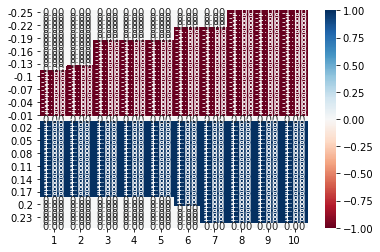

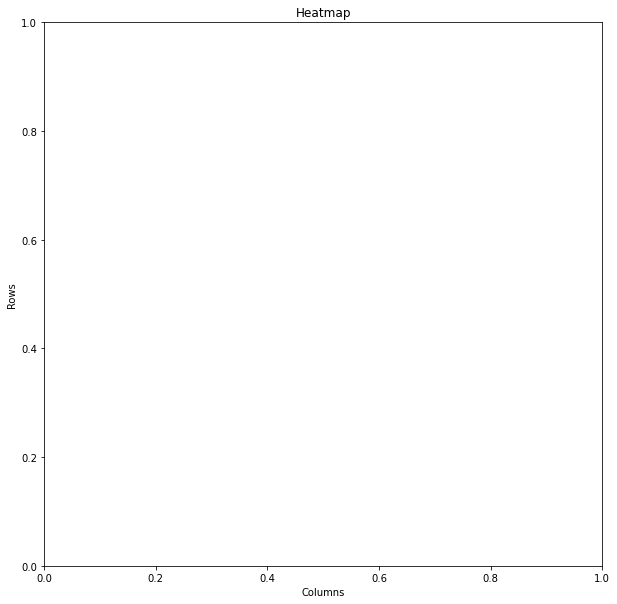

In [460]:
sns.heatmap(heatmap_data, cmap='RdBu', center=0, annot=True, fmt=".2f")


plt.figure(figsize=(10,10))

# 添加标题和标签
plt.title("Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")

# 显示热力图
plt.show()


## Find the URLs based on top 15 themes of different levels of return, and then filter the key words in these URLs (We'll use news of upstream companies)

In [ ]:
# 0.07
all_themes = pd.Series(dtype='str') 
for themes in related_news[-0.07]['FinalThemes']:
    themes_list = themes.split(',')
    all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    
# 打印当前年份和月份的主题及其出现次数
theme_counts = all_themes.value_counts()
sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
top_themes = sorted_themes[:15]

for theme, count in top_themes:
    print(theme, count)

In [ ]:
# 0.24
all_themes = pd.Series(dtype='str') 
for themes in related_news[-0.08]['FinalThemes']:
    themes_list = themes.split(',')
    all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    
# 打印当前年份和月份的主题及其出现次数
theme_counts = all_themes.value_counts()
sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
top_themes = sorted_themes[:15]

#for theme, count in top_themes:
    #print(theme, count)

In [67]:
newsby_themes = {}
for threshold in thresholds:
    if related_news[threshold].empty:
        continue
    all_themes = pd.Series(dtype='str') 
    for themes in related_news[threshold]['FinalThemes']:
        themes_list = themes.split(',')
        all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    # 打印当前年份和月份的主题及其出现次数
    theme_counts = all_themes.value_counts()
    sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
    top_themes = sorted_themes[:15]
    
    for theme, _ in top_themes:
        List = []
        newsby_themes[(threshold, theme)] = pd.DataFrame(columns=related_news[threshold].columns)
        for i in range(len(related_news[threshold])):
            row = related_news[threshold].iloc[i,:]
            themes = row['FinalThemes'].split(',')
            if theme in themes:
                List.append(i)
        newsby_themes[(threshold, theme)] = related_news[threshold].iloc[List,:]

In [525]:
newsby_themes = {}

for theme, _ in top_themes:
    List = []
    newsby_themes[(-0.24, theme)] = pd.DataFrame(columns=related_news[-0.24].columns)
    for i in range(len(related_news[-0.24])):
        row = related_news[-0.24].iloc[i,:]
        themes = row['FinalThemes'].split(',')
        if theme in themes:
            List.append(i)
    newsby_themes[(-0.24, theme)] = related_news[-0.24].iloc[List,:]

In [68]:
# For example,
newsby_themes[(-0.25, 'TAX_ETHNICITY')]

,Unnamed: 0,DocumentIdentifier,V2Tone,Themes,Organizations,FinalThemes,sign,Date
DATE,,,,,,,,
2023-02-17 14:15:00,35973,https://www.thenewswire.com/press-releases/1k4...,0.900901,UNGP_FORESTS_RIVERS_OCEANS;TAX_FNCACT;TAX_FNCA...,['blackrock inc'],"TAX_ETHNICITY,ENV_GREEN,LEGISLATION,SLFID_MINE...",Negative,2023-02-17
2023-02-17 17:30:00,35996,https://www.proactiveinvestors.co.uk/companies...,0.246103,TAX_FNCACT;TAX_FNCACT_JOINERS;ECON_IPO;GENERAL...,"['health mart', 'nasdaq inc']","ECON_IPO,GENERAL_HEALTH,MEDICAL,TAX_ETHNICITY,...",Negative,2023-02-17
2023-02-17 23:30:00,36035,https://www.marketwatch.com/story/tesla-said-t...,0.000000,TAX_ETHNICITY;TAX_ETHNICITY_CANADIAN;TAX_FNCAC...,['tesla inc'],"TAX_ETHNICITY,ENV_MINING",Negative,2023-02-17
2023-02-18 14:30:00,36051,https://economictimes.indiatimes.com/tech/tech...,0.000000,TAX_FNCACT;TAX_FNCACT_MINER;TAX_FNCACT_ADVISER...,['tesla inc'],"ENV_MINING,TAX_ETHNICITY",Negative,2023-02-18
2023-02-18 15:00:00,36052,https://www.business-standard.com/article/inte...,-0.216920,TAX_FNCACT;TAX_FNCACT_MINER;TAX_FNCACT_ADVISER...,['tesla inc'],"ENV_MINING,TAX_ETHNICITY",Negative,2023-02-18
...,...,...,...,...,...,...,...,...
2023-04-24 13:00:00,40207,https://finance.yahoo.com/news/wealth-minerals...,3.327172,USPEC_POLICY1;EPU_POLICY;EPU_POLICY_POLICY;EPU...,"['facebook inc', 'albemarle corp', 'twitter inc']","GENERAL_GOVERNMENT,ENV_MINING,TAX_ETHNICITY,BA...",Negative,2023-04-24
2023-04-24 13:45:00,40211,https://www.juniorminingnetwork.com/junior-min...,3.330250,USPEC_POLICY1;EPU_POLICY;EPU_POLICY_POLICY;EPU...,"['facebook inc', 'albemarle corp', 'twitter inc']","GENERAL_GOVERNMENT,ENV_MINING,TAX_ETHNICITY,BA...",Negative,2023-04-24
2023-04-24 15:15:00,40222,https://www.juniorminingnetwork.com/junior-min...,-0.247831,UNGP_FORESTS_RIVERS_OCEANS;WB_2939_TANTALUM;WB...,['twitter inc'],"NATURAL_DISASTER,MANMADE_DISASTER_IMPLIED,ENV_...",Negative,2023-04-24


In [69]:
for i in range(len(newsby_themes[(-0.25, 'TAX_ETHNICITY')])):
    print(newsby_themes[(-0.25, 'TAX_ETHNICITY')].iloc[i,:]['DocumentIdentifier'])

https://www.thenewswire.com/press-releases/1k49Fbapz-tearlach-announces-bulk-sample-timing-and-drill-permits-at-gabriel-lithium-project-tonopah-nevada.html
https://www.proactiveinvestors.co.uk/companies/news/1006598/small-cap-feast-atlantic-lithium-benchmark-holdings-jadestone-energy-oncimmune-holdings-and-more-1006598.html
https://www.marketwatch.com/story/tesla-said-to-consider-buying-canadian-miner-sigma-lithium-report-6e403166
https://economictimes.indiatimes.com/tech/technology/tesla-considering-a-bid-for-battery-metals-miner-sigma-lithium-corp/articleshow/98047785.cms
https://www.business-standard.com/article/international/tesla-considering-takeover-of-battery-metals-miner-sigma-lithium-corp-123021800635_1.html
https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-market-rally-holds-up-tesla-lithium-buzz-nvidia-earnings/
https://www.so-co-it.com/post/677535/the-world-needs-high-quality-lithium.html
https://markets.financialcontent.com/stocks/article/gnwcq-20

In [70]:
from collections import Counter
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_list = stopwords.words('english')
special_words = ['https', 'www', 'com', 'html']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yangli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
keywordsby_themes = {}
for key in newsby_themes.keys():
    keywords = []
    for url_string in newsby_themes[key]['DocumentIdentifier']:
        tokens = re.findall(r'\w+', url_string)
        tokens = [token for token in tokens if token.lower() not in stopwords_list and len(token) > 1 and token.lower() not in special_words]
        keywords.extend(tokens)
    
    keyword_counts = Counter(keywords)
    top_keywords = keyword_counts.most_common(200)
    
    keywordsby_themes[key] = top_keywords
    
        
        

In [72]:
for key in keywordsby_themes.keys():
    print(key)
    print (keywordsby_themes[key])

(-0.25, 'TAX_ETHNICITY')
[('lithium', 395), ('news', 125), ('2023', 114), ('markets', 47), ('04', 42), ('03', 40), ('chile', 38), ('business', 37), ('mining', 37), ('stocks', 36), ('article', 33), ('yahoo', 33), ('industry', 33), ('companies', 30), ('nachrichten', 28), ('project', 27), ('finanznachrichten', 27), ('de', 27), ('htm', 27), ('au', 27), ('finance', 26), ('plan', 26), ('piedmont', 25), ('battery', 24), ('press', 23), ('releases', 23), ('announces', 23), ('proactiveinvestors', 23), ('control', 23), ('21', 22), ('miner', 21), ('plans', 21), ('china', 21), ('vast', 21), ('state', 21), ('nationalize', 20), ('metals', 18), ('chiles', 17), ('billion', 16), ('albemarle', 16), ('en', 16), ('north', 15), ('dismays', 15), ('bid', 14), ('corp', 14), ('world', 14), ('resources', 14), ('asx', 14), ('investing', 14), ('global', 14), ('ion', 14), ('drill', 13), ('tesla', 13), ('drilling', 13), ('296', 13), ('american', 13), ('money', 13), ('coloured', 13), ('ties', 13), ('standard', 12), (

(0.19, 'LEGISLATION')
[('lithium', 150), ('news', 60), ('de', 30), ('htm', 29), ('finanznachrichten', 28), ('nachrichten', 28), ('2023', 27), ('investors', 22), ('announces', 20), ('296', 18), ('2021', 17), ('standard', 17), ('corp', 17), ('project', 17), ('action', 17), ('ltd', 16), ('releases', 15), ('05', 15), ('encourages', 14), ('losses', 14), ('press', 12), ('lake', 12), ('class', 12), ('americas', 11), ('energy', 11), ('article', 11), ('update', 11), ('piedmont', 11), ('exploration', 11), ('01', 10), ('markets', 10), ('nevada', 10), ('inc', 10), ('prnewswire', 10), ('rosen', 10), ('first', 9), ('battery', 9), ('top', 9), ('deadline', 9), ('firm', 9), ('minerals', 9), ('counsel', 9), ('snow', 9), ('public', 8), ('drilling', 8), ('stocks', 8), ('provides', 8), ('12', 8), ('investor', 8), ('forextv', 8), ('securities', 8), ('millennial', 8), ('program', 8), ('release', 7), ('miner', 7), ('foremost', 7), ('quebec', 7), ('silver', 7), ('valley', 7), ('tearlach', 7), ('ceo', 7), ('inv

In [565]:
import re

url_string = "https://www.express.co.uk/news/uk/1408059/cornwall-mineral-stores-lithium-car-batteries-boris-johnson-industrial-revolution-spt"

# 使用正则表达式进行拆分
tokens = re.findall(r'\w+', url_string)

print(tokens)


['https', 'www', 'express', 'co', 'uk', 'news', 'uk', '1408059', 'cornwall', 'mineral', 'stores', 'lithium', 'car', 'batteries', 'boris', 'johnson', 'industrial', 'revolution', 'spt']


# Filter the news based on volatility change

In [41]:
days = 10
thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08]
results = {}

In [42]:
# First find the dates where volatility changes 
vol_changes = {}
df_Lifu_price['log_return'] = np.log(df_Lifu_price['Close']).diff() #计算log return
for i in range(days*2, len(df_Lifu_price)):
    current_date = df_Lifu_price.index[i]
    
    # 遍历之前的若干天 
    for j in range(5, days+1):
        past_date = df_Lifu_price.index[i - j]
        current_vol = df_Lifu_price['log_return'].iloc[i-j:i].std()
        past_vol = df_Lifu_price['log_return'].iloc[i-j*2:i-j].std()
        vol_change = current_vol - past_vol
        
        vol_changes[(past_date, current_date, j)] = vol_change  # 储存波动率变化值

        # 检查波动率变化是否超过每个阈值
        for threshold in thresholds:
            if abs(vol_change) > threshold:
                key = (threshold, j)
                if key not in results:
                    results[key] = []
                results[key].append((past_date, current_date, j))

In [43]:
# find news on the day that volatility changed significantly
filtered_news = {}
number_news = {}


for key, result_dates in results.items():
    df_filtered_news = pd.DataFrame()
    
    for result in result_dates:
        past_date, current_date, j = result
        
        # filter news between current_date and future_date 
        filtered_Lithium_news = Lithium_news[(Lithium_news.index >= past_date) & (Lithium_news.index <= current_date)]
        past_vol = df_Lifu_price['log_return'].iloc[i-j*2:i-j].std()
        current_vol = df_Lifu_price['log_return'].iloc[i-j:i].std()
        vol_change = current_vol - past_vol
        filtered_Lithium_news['sign'] = np.where(vol_change >= 0, 'Positive', 'Negative')
        # append the filtered news to the dataframe
        df_filtered_news = pd.concat([df_filtered_news, filtered_Lithium_news])
    
    #remove duplicates
    df_filtered_news =  df_filtered_news.drop_duplicates()
    number = len(df_filtered_news)
    # add the dataframe to the dictionary
    filtered_news[key] = df_filtered_news
    number_news[key] = number 

<ipython-input-43-891c9700ca06>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_Lithium_news['sign'] = np.where(vol_change >= 0, 'Positive', 'Negative')


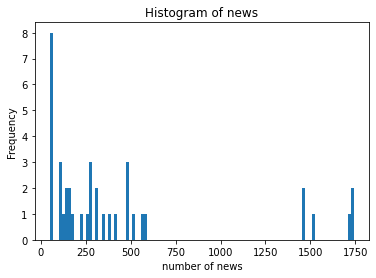

In [44]:
# Histogram of number of news
values = list(number_news.values())

plt.hist(values, bins=100)
plt.xlabel('number of news')
plt.ylabel('Frequency')
plt.title('Histogram of news')
plt.show()

In [45]:
# Then search news based on different percentage we set 
# we'll merge 'threshold' from this step

thresholds = [-0.08, -0.07, -0.06, -0.05, 
              -0.04, -0.03, -0.02, -0.01, 0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]


related_news = {}

for threshold in thresholds:
    news_pos = pd.DataFrame()
    news_neg = pd.DataFrame()
    for i in range(1, days+1):
        if (threshold,i) not in filtered_news:
            continue
        news_pos = pd.concat([news_pos, filtered_news[(threshold,i)][filtered_news[(threshold,i)]['sign']=='Positive']])
        news_neg = pd.concat([news_neg, filtered_news[(threshold,i)][filtered_news[(threshold,i)]['sign']=='Negative']])
    news_pos = news_pos.drop_duplicates()
    news_neg = news_neg.drop_duplicates()
    related_news[threshold] = news_pos
    related_news[-threshold] = news_neg

In [46]:
# Search top 15 themes in each level of return 
# e.g., search top 15 themes that are in news which caused +8% return
all_themes = pd.Series(dtype='str') 
for themes in related_news[0.08]['FinalThemes']:
    themes_list = themes.split(',')
    all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)
    
    
# print 
theme_counts = all_themes.value_counts()
sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
top_themes = sorted_themes[:15]

for theme, count in top_themes:
    print(theme, count)

TAX_ETHNICITY 31
ENV_MINING 27
SCIENCE 26
ECON_STOCKMARKET 22
GENERAL_GOVERNMENT 16
TAX_DISEASE 12
ENV_CLIMATECHANGE 10
MANMADE_DISASTER_IMPLIED 10
LEGISLATION 10
GENERAL_HEALTH 8
NEW_CONSTRUCTION 8
ECON_SUBSIDIES 7
MEDICAL 6
ELECTION 6
ENV_GREEN 6


In [47]:
# Write theme counts of each return level into excel
with pd.ExcelWriter('themes_counts_volatility.xlsx') as writer:
    for return_value in thresholds:
        all_themes = pd.Series(dtype='str')
        if 'FinalThemes' in related_news[return_value].columns:
            for themes in related_news[return_value]['FinalThemes']:
                themes_list = themes.split(',')
                all_themes = all_themes.append(pd.Series(themes_list, dtype='str'), ignore_index=True)

        # 打印当前年份和月份的主题及其出现次数
            theme_counts = all_themes.value_counts()
            sorted_themes = sorted(theme_counts.items(), key=lambda x: x[1], reverse=True)
            top_themes = sorted_themes[:15]

            df = pd.DataFrame(top_themes, columns=['Theme', 'Count'])
            df.to_excel(writer, sheet_name=str(return_value), index=False)

    print('Themes and counts written to Excel.')


Themes and counts written to Excel.


## Find the URLs based on top 15 themes of different levels of return, and then filter the key words in these URLs (We'll use news of upstream companies)